In [1]:
!nvidia-smi

Wed Oct  2 04:34:46 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5889.4/8062.4 GB disk)


In [4]:
!pip install roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets



from roboflow import Roboflow
rf = Roboflow(api_key="YohwIPr0iQFNeATEe9Hc")
project = rf.workspace("telkom-university-mfinb").project("neudet-steel-surface-defects")
version = project.version(4)
dataset = version.download("yolov8")
                

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to NEUDET-Steel-Surface-Defects-4 in yolov8:: 100%|██████████| 3610/3610 [00:00<00:00, 7665.26it/s]


In [5]:
dataset.location

'/kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4'

**NOTE:** Make sure to run commands below to make dataset work with YOLO11 training.

In [6]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=63 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 196MB/s]
Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/data.yaml, epochs=63, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

In [8]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch4187.jpg
R_curve.png					   train_batch4188.jpg
args.yaml					   train_batch4189.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1727843879.05bb20d37cd5.108.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


In [9]:
import pandas as pd
result = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
result

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.8095,3.00010,1.8837,0.44903,0.23079,0.23765,0.09293,2.4548,2.7329,2.5238,0.000329,0.000329,0.000329
1,2,1.7245,2.05350,1.8010,0.61046,0.24512,0.21229,0.08426,2.5638,3.4324,2.7531,0.000652,0.000652,0.000652
2,3,1.7417,1.99080,1.7984,0.40655,0.33350,0.22384,0.09006,2.5819,3.7863,2.6378,0.000964,0.000964,0.000964
3,4,1.6927,1.89770,1.7842,0.75002,0.24560,0.31235,0.12286,2.6120,2.8398,2.5486,0.000953,0.000953,0.000953
4,5,1.6704,1.85680,1.7694,0.41230,0.39661,0.36848,0.14326,2.4085,2.5340,2.3376,0.000937,0.000937,0.000937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,1.2171,0.99410,1.4568,0.74618,0.61152,0.70222,0.37211,1.6589,1.2961,1.7973,0.000089,0.000089,0.000089
59,60,1.1935,0.99349,1.4428,0.68957,0.65780,0.71235,0.37686,1.6617,1.3186,1.7873,0.000073,0.000073,0.000073
60,61,1.2058,1.00030,1.4581,0.70877,0.63636,0.70875,0.38176,1.6036,1.3034,1.7436,0.000057,0.000057,0.000057
61,62,1.1963,0.96329,1.4346,0.67126,0.65970,0.70740,0.37752,1.6342,1.3166,1.7698,0.000041,0.000041,0.000041


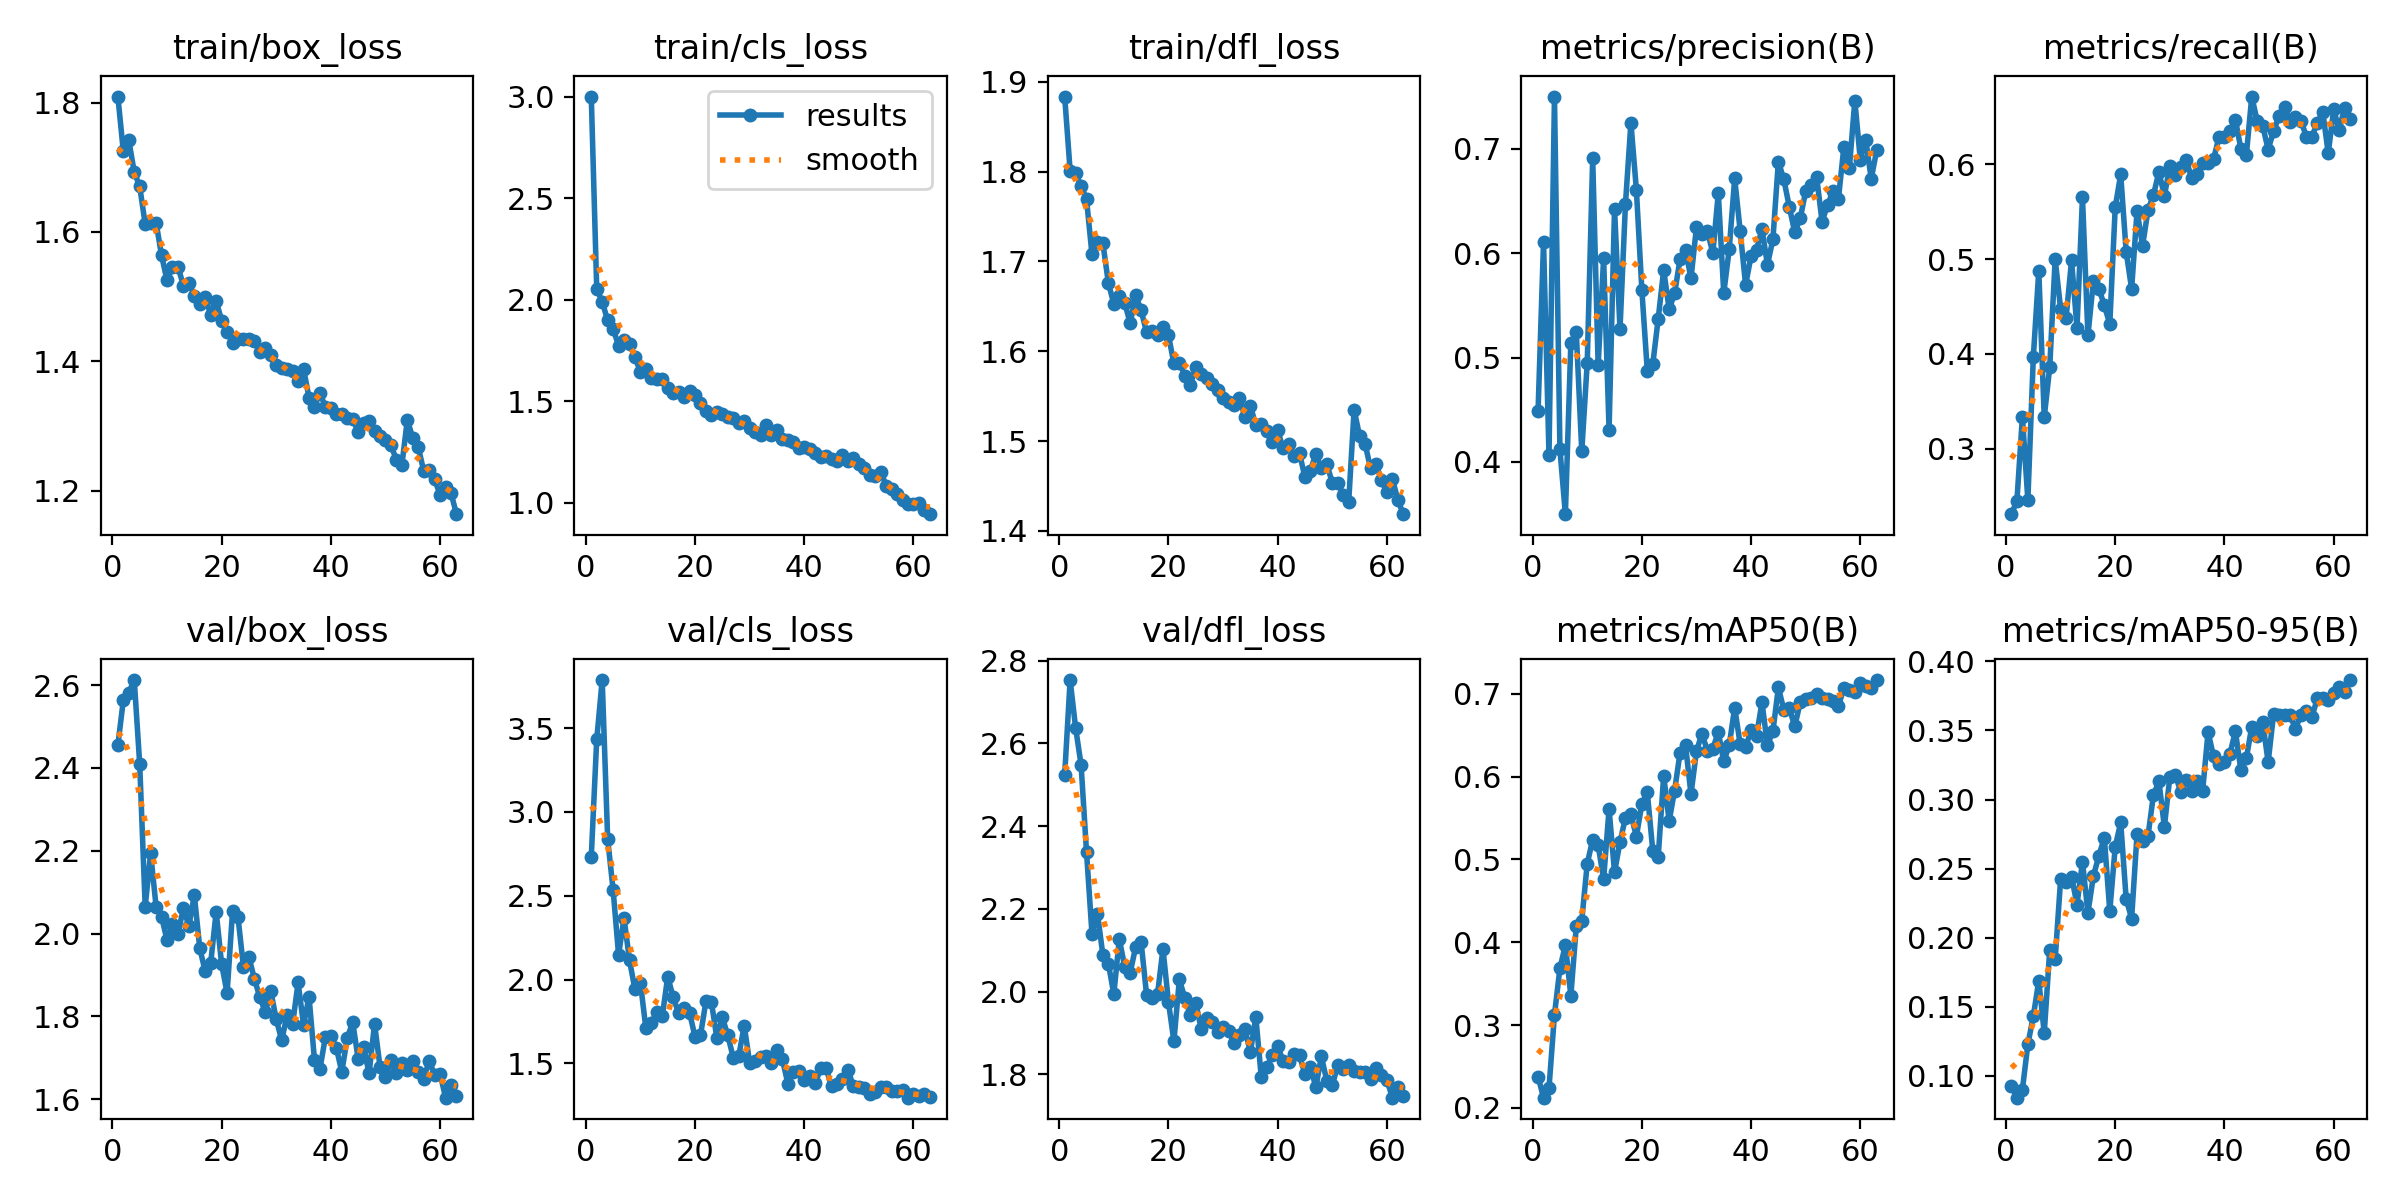

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

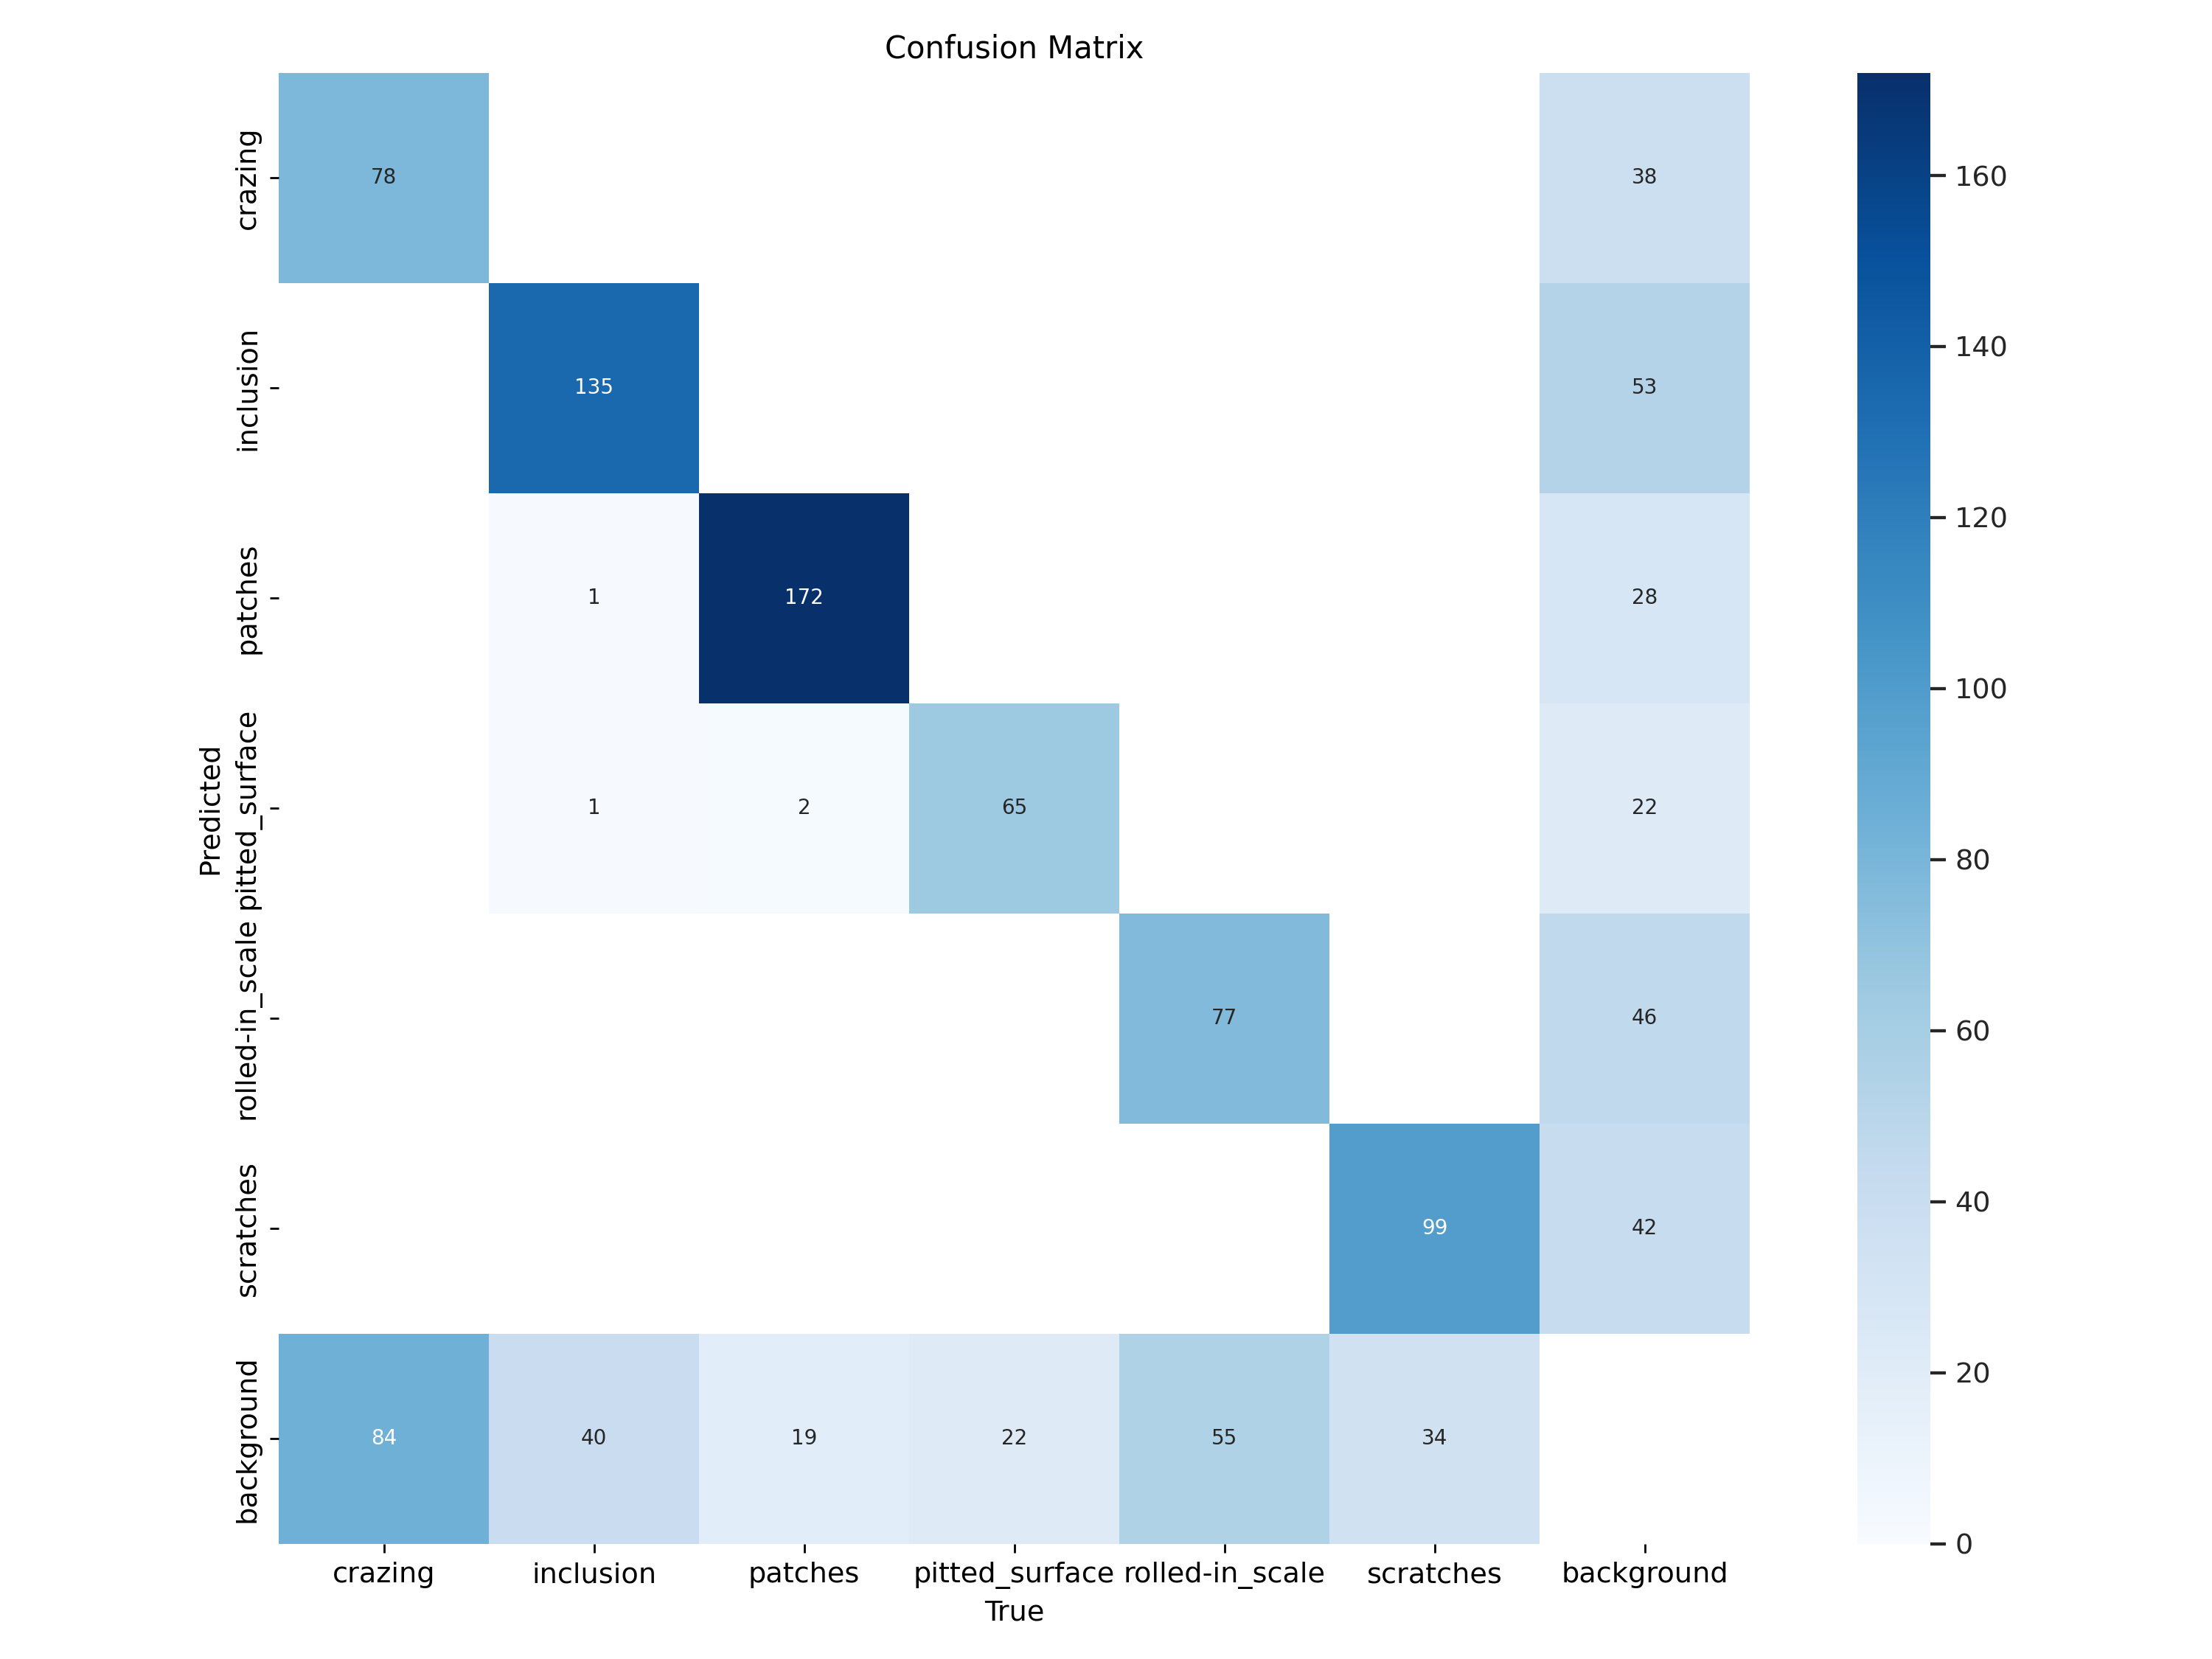

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

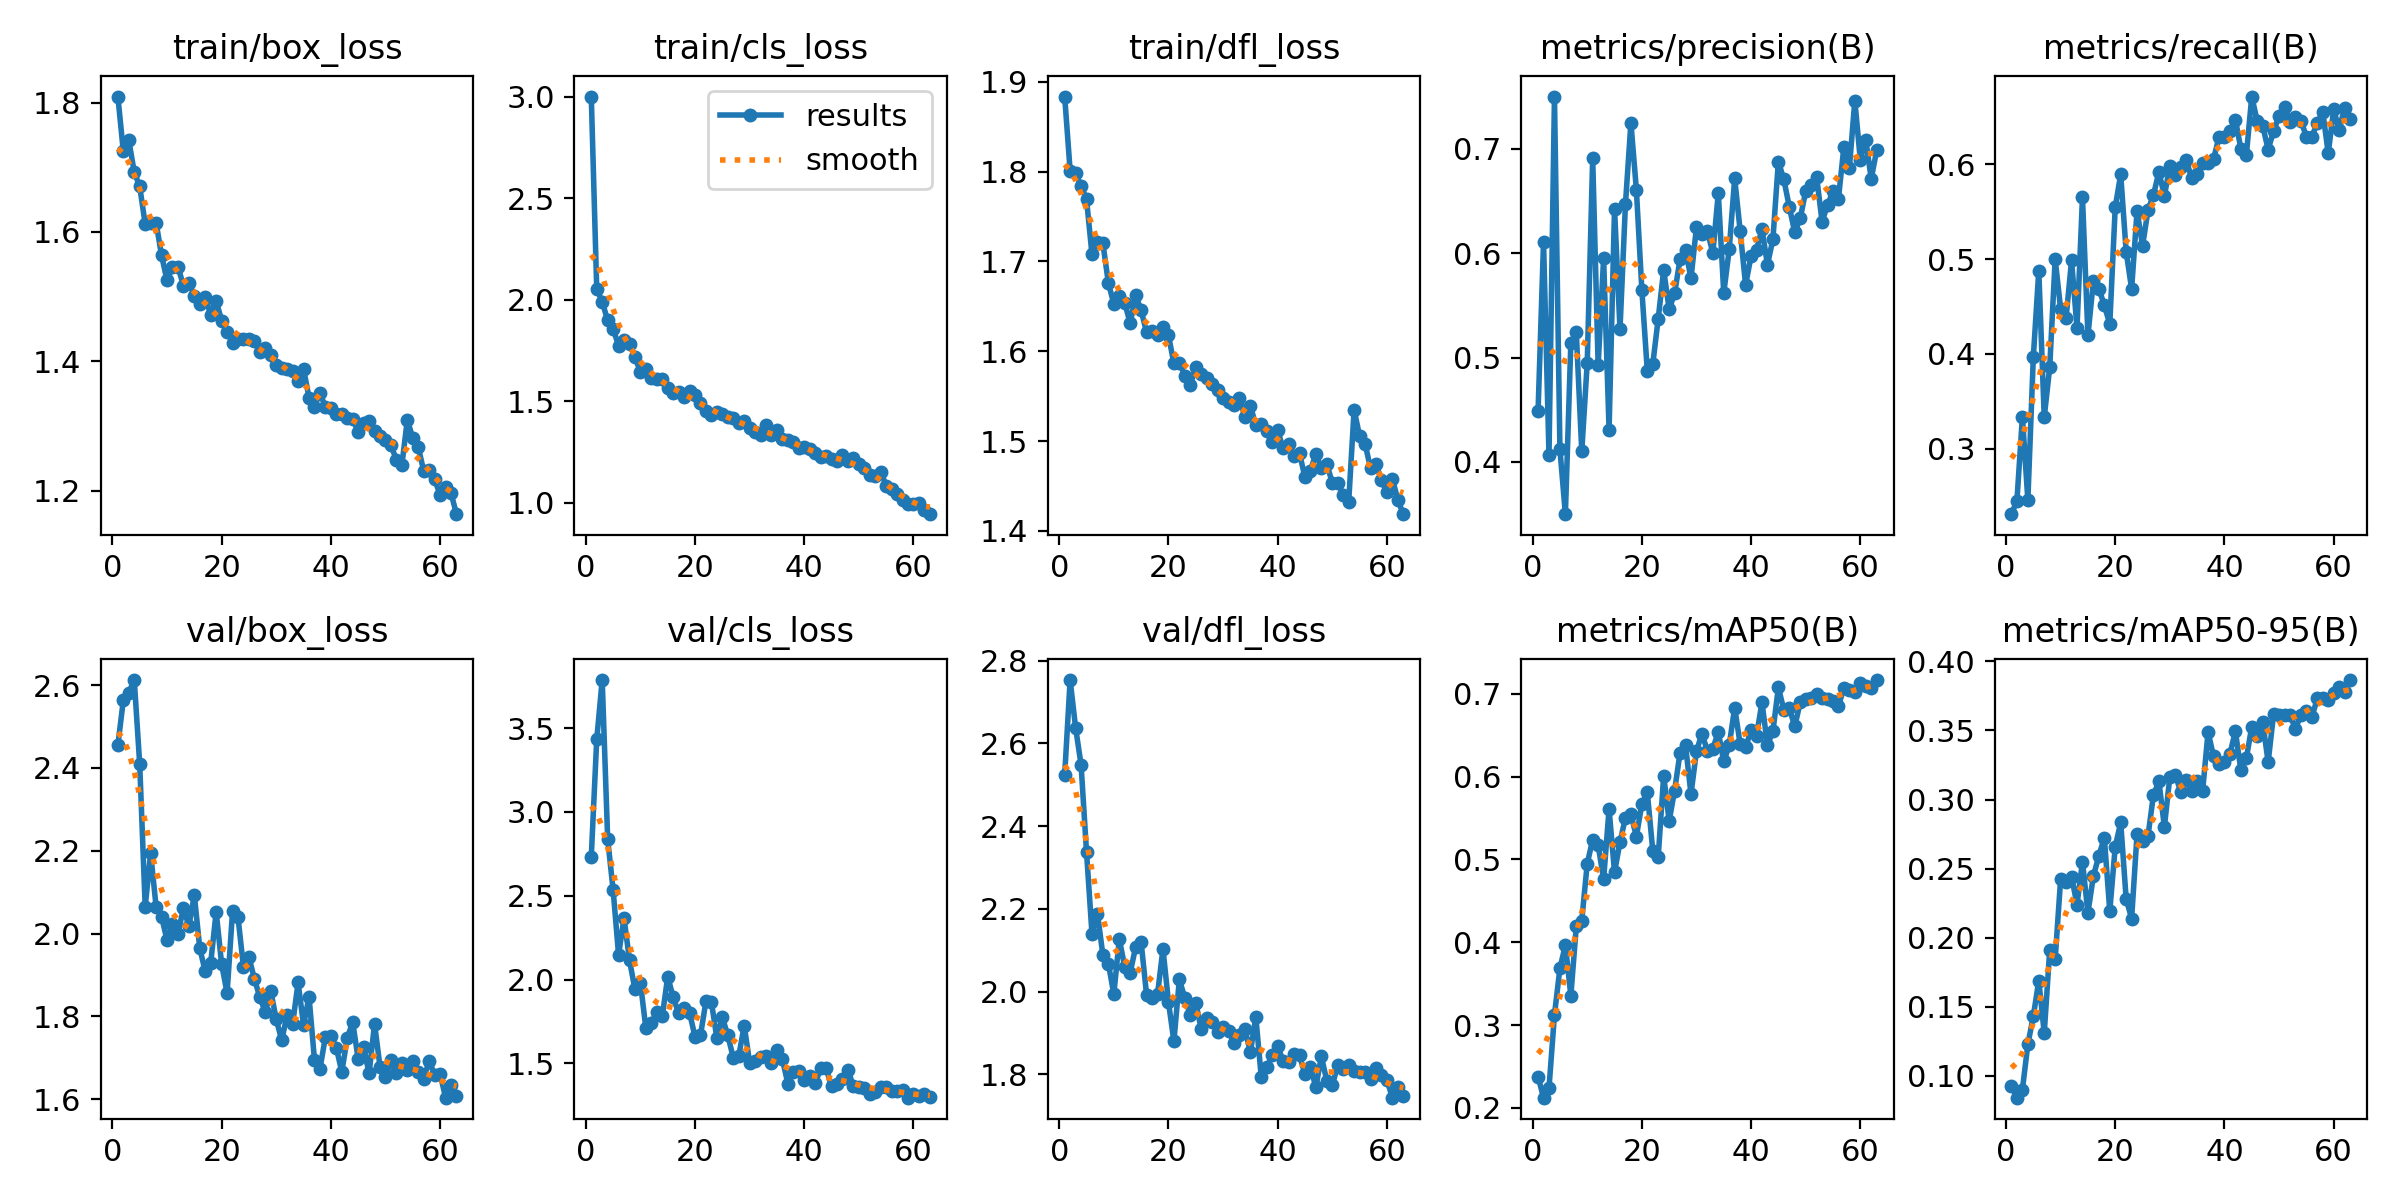

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

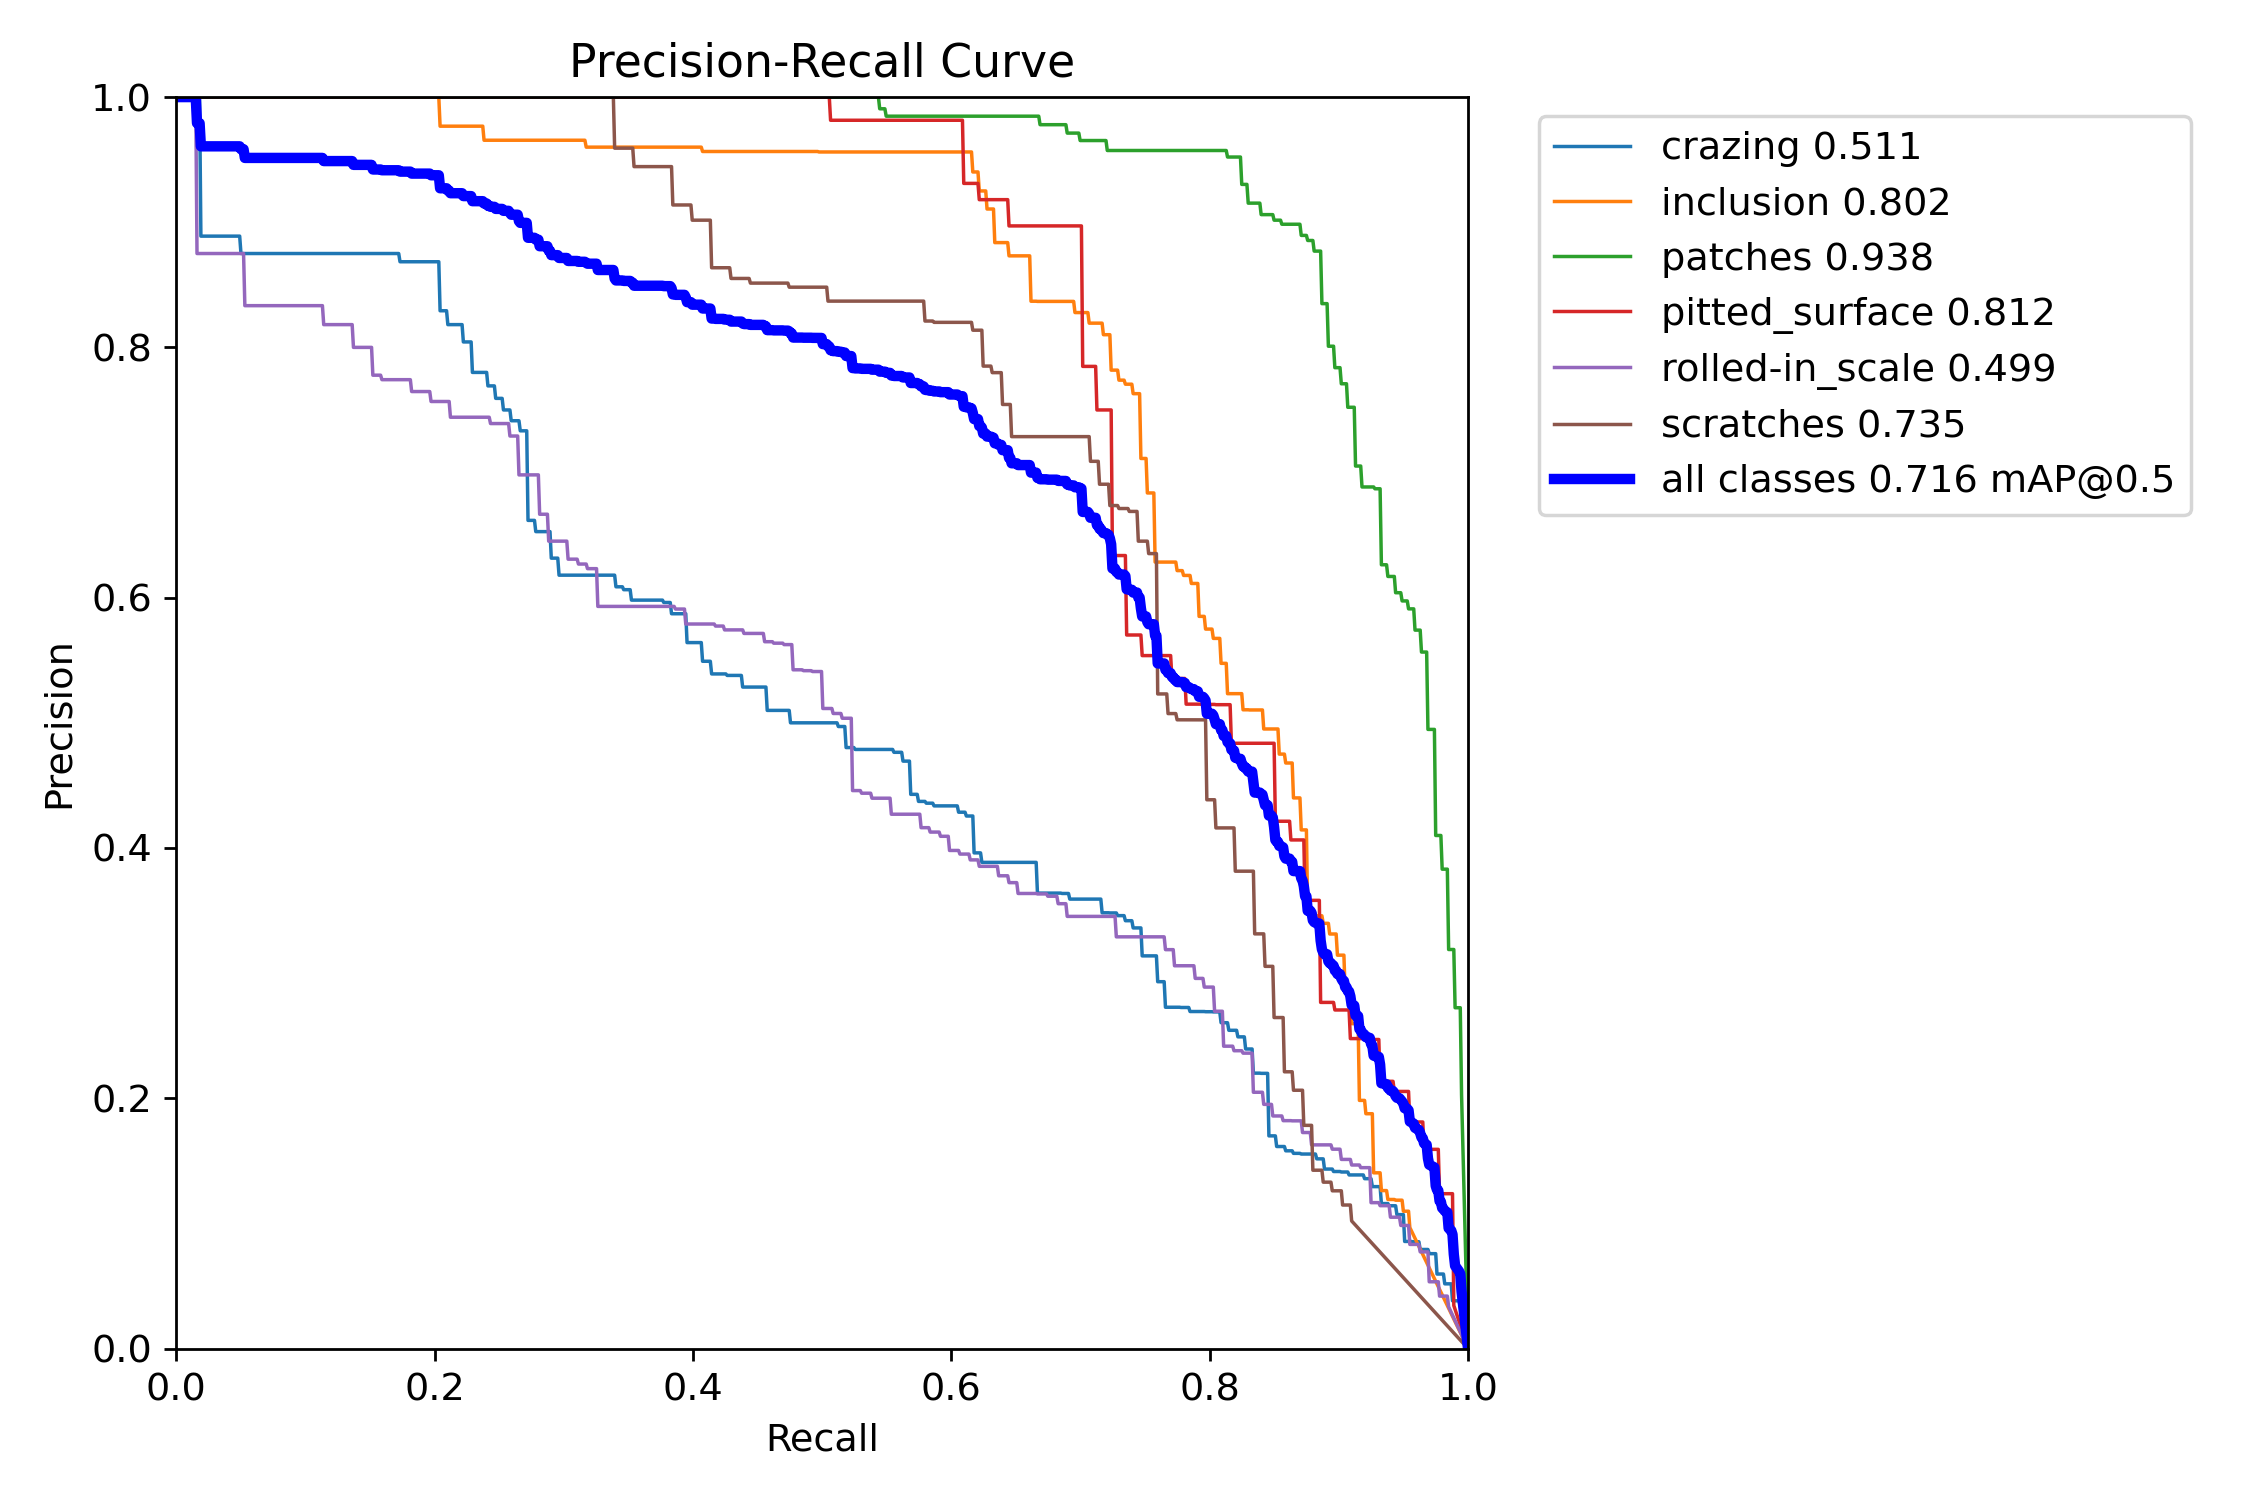

In [15]:
from IPython.display import Image as IPyImage

IPyImage("/kaggle/working/runs/detect/train/PR_curve.png", width=600)

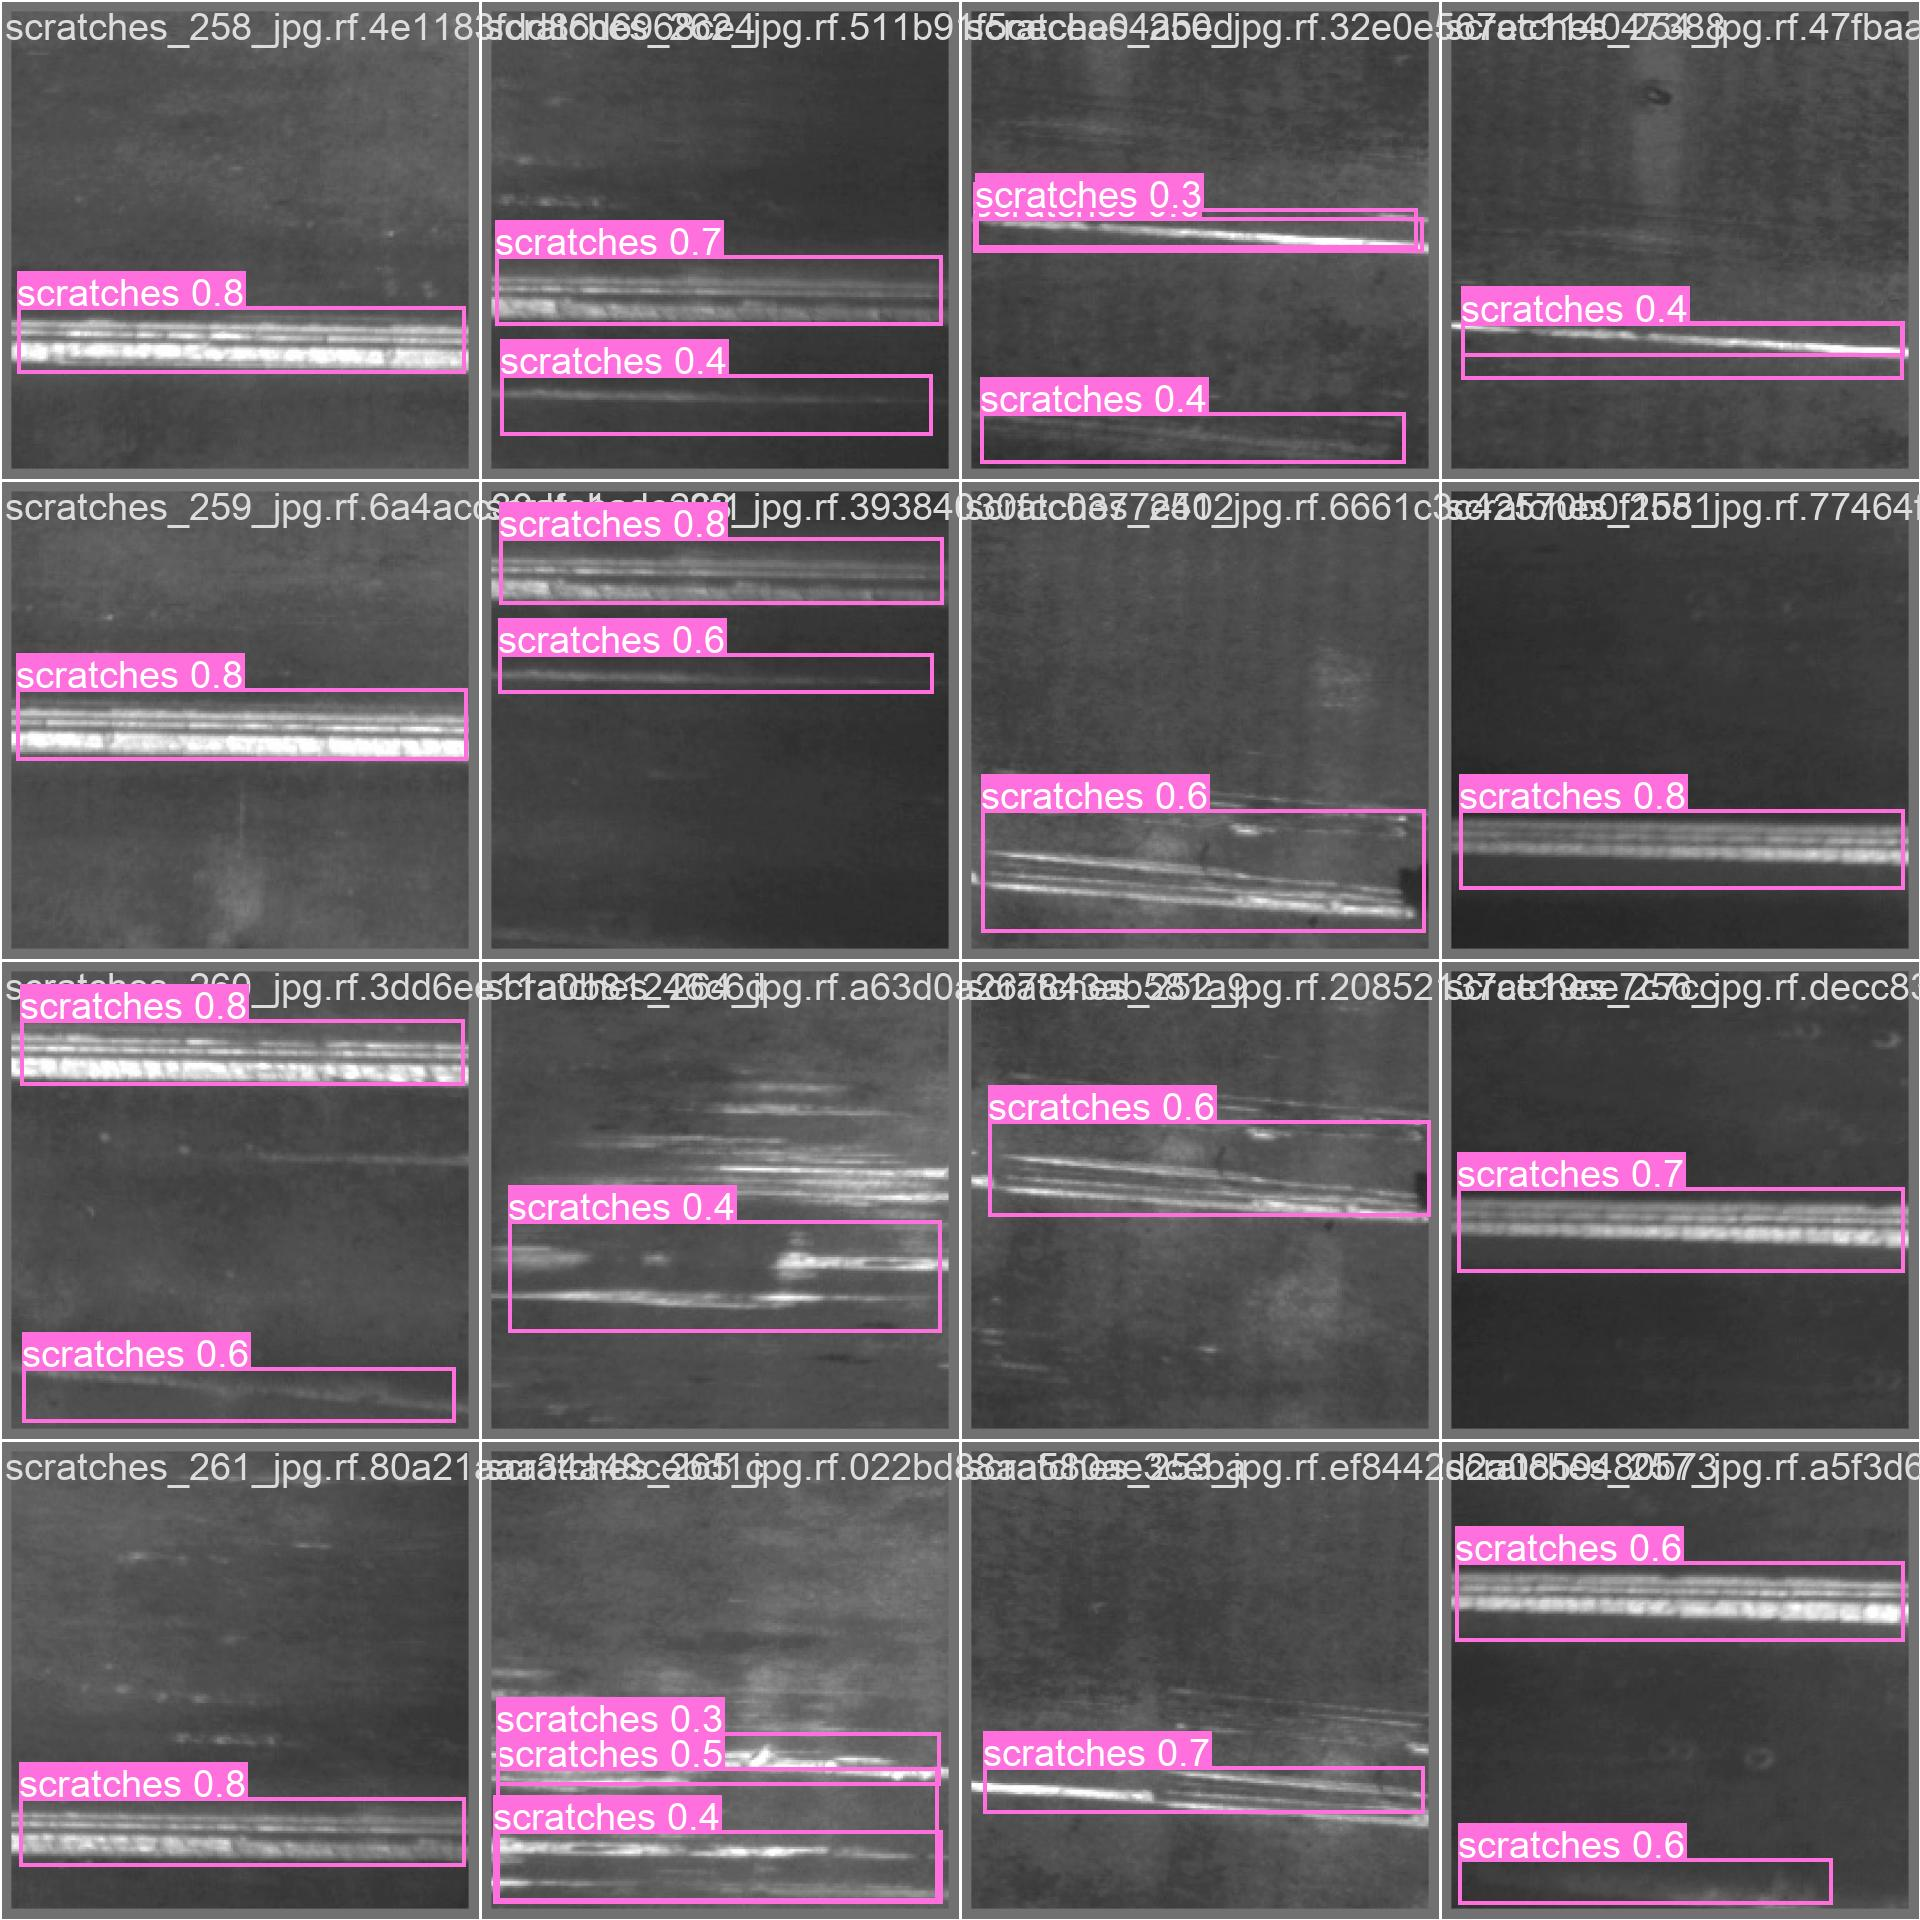

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/valid/labe
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        368        884      0.694      0.649      0.716      0.386
               crazing         60        162      0.592      0.359      0.514      0.213
             inclusion         84        177      0.722       0.74      0.801      0.441
               patches         73        193      0.864      0.886      0.935      0.605
        pitted_surface         60         87      0.743      0.713      0.812      0.438
       rolled-in_scale         60        132      0.546      0.485      0.501       0.23
             scratches         68        133      0.698      0.714      0.732      0.391
Speed: 0.9ms preprocess, 8.5ms inference, 0.0ms loss, 1.

In [16]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.50 source={dataset.location}/test/images save=True

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/172 /kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/test/images/scratches_175_jpg.rf.18a1bd916d06e903e09f17bdb45549e9.jpg: 640x640 2 scratchess, 15.6ms
image 2/172 /kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/test/images/scratches_179_jpg.rf.5c8d23371ecd9e9ec7287957fc55c641.jpg: 640x640 1 scratches, 15.6ms
image 3/172 /kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/test/images/scratches_180_jpg.rf.1d62c8c2a4015fca68493a00c249867a.jpg: 640x640 2 scratchess, 15.5ms
image 4/172 /kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/test/images/scratches_181_jpg.rf.78fc3b9be0aa9e1507ab133f271f3c5c.jpg: 640x640 1 scratches, 15.5ms
image 5/172 /kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/test/images/scratches_182_jpg.rf.50de67bd64f7ebdf2a7aee6c0dbf93f7.jpg: 640x640 1 scratches, 15.5ms
ima

In [28]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/datasets/NEUDET-Steel-Surface-Defects-4/train/images/*'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [9]:
from yolov11.evaluator import YOLOv11Evaluator

ModuleNotFoundError: No module named 'yolov11'